1. Importing libraries 

In [1]:
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os 

Setting display options

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

2. Reading the data 

In [3]:
PROJECT_DIR  = "/Users/abhisheksaurav/Desktop/real_estate_project/"
DATA_DIR = "Data Collection/Data/City/chandigarh/cleaned_data"

In [4]:
def get_data(name):
    file_name = "{}.csv".format(name)
    file_path = os.path.join(PROJECT_DIR, DATA_DIR, file_name)
    return pd.read_csv(file_path)

In [5]:
df = get_data("gurgaon_properties_cleaned_v1")

In [6]:
df.head(1)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 31,4.25,26235.0,1620.0,Plot area 204(170.57 sq.m.)Built Up area: 200 sq.yards (167.23 sq.m.)Carpet area: 180 sq.yards (150.5 sq.m.),5,5,3+,"store room,pooja room",3.0,North-East,5 to 10 Year Old,"['Hanuman Mandir', 'Icici bank ATM', 'State bank of india ATM', 'Axis bank ATM', 'Hdfc bank ATM', 'State bank of india ATM', 'Icici ATM', 'Citi bank ATM', 'Axis bank ATM', 'Hdfc ATM', 'Axis bank ATM', 'Shivam Hospital Gurgaon', 'Ahmed Hospital Multi Speciality', 'Dispencery', 'Dayal Eye & Maternity Centre', 'Bansal Medicare and Maternity Centre', 'Pushpanjali Hospital', 'Pushpanjali Hospital Gurgaon', 'Kalyani Hospital Gurgaon', 'Medanta', 'Aarvy Hospital', 'Centre For Sight Gurgaon Sector 29', 'Saraswati Hospital Gurgaon', 'Gardian Pharmacy', 'City Medical', 'Gardian Pharmacy', 'IBP Petrol Pump', 'Indian Oil', 'Indian Oil', 'Hdfc bank', 'State bank of india sbi', 'Punjab national bank', 'Om Sweets', 'Fast Food', 'Fast food', 'Bar and restaurant', 'Cafe Coffee Day', 'Darbar', '32nd Milestone', 'Raj Restaurant', 'Dhabba', 'KFC', 'CR Model Public School', 'Salvan Public School', 'St. Angels Jr', 'govt sec school', 'Manav Rachna School', 'Manav Rachna Swimming Pool', 'District library gurgaon']","['10 Wardrobe', '1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Geyser', '1 Stove', '16 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Park', 'Visitor Parking', 'Security Personnel', 'Waste Disposal']"


4. Detailed Analysis

4.1 areaWithType

In [7]:
(df
 .sample(5)[['price','area', 'areaWithType']]
)

,price,area,areaWithType
268,2.15,5201.0,Super Built up area 5200(483.1 sq.m.)Built Up area: 4600 sq.ft. (427.35 sq.m.)Carpet area: 4000 sq.ft. (371.61 sq.m.)
3327,1.35,1105.0,Plot area 150(125.42 sq.m.)Built Up area: 2052 sq.yards (1715.73 sq.m.)
3775,1.72,1811.0,Super Built up area 1811(168.25 sq.m.)Carpet area: 996.3 sq.ft. (92.56 sq.m.)
1685,4.80,2895.0,Super Built up area 2895(268.95 sq.m.)Built Up area: 2500 sq.ft. (232.26 sq.m.)Carpet area: 2200 sq.ft. (204.39 sq.m.)
656,4.75,3410.0,Super Built up area 3410(316.8 sq.m.)Built Up area: 3200 sq.ft. (297.29 sq.m.)Carpet area: 3100 sq.ft. (288 sq.m.)


In [8]:
# function to extract the Super built up area 

def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# function to extract the built up area or carpet area 

def get_area(text, area_type):
    match = (re
             .search(area_type + r'\s*:\s*(\d+\.?\d*)', 
                     text)
    )
    if match:
        return float(match
                     .group(1))
    return None

In [10]:
# this function checks if the area is in sq.m and converts to square feet if needed 

def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value


In [11]:
# extracting super built up area and converting it into sq_ft if needed 

df['super_built_up_area'] = (df
                             .areaWithType
                             .apply(get_super_built_up_area)
)
df['super_built_up_area'] = (df
                             .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                                              x['super_built_up_area']), 
                                                              axis=1)
)

In [12]:
# extracting built up area and converting it if needed 

df['built_up_area'] = (df
                       .areaWithType
                       .apply(lambda x: get_area(x, 'Built Up area')))

df['built_up_area'] = (df
                       .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                              x['built_up_area']), axis = 1))

In [13]:
# extracting carpet area and converting it if needed 

df['carpet_area'] = (df 
                     .areaWithType 
                     .apply(lambda x: get_area(x, "Carpet area")))

df["carpet_area"] = (df
                     .apply(lambda x: convert_to_sqft(x['areaWithType'], 
                                                      x['carpet_area']), axis= 1)
                        )

In [14]:
df[['price', 'property type', 'price_per_sq_ft', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']].sample(5)

,price,property type,price_per_sq_ft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3236,0.65,flat,4961.0,1310.0,Super Built up area 1300(120.77 sq.m.)Built Up area: 1225 sq.ft. (113.81 sq.m.)Carpet area: 1075 sq.ft. (99.87 sq.m.),1300.0,1225.0,1075.0
3179,1.95,flat,14444.0,1350.0,Super Built up area 2191(203.55 sq.m.)Built Up area: 1650 sq.ft. (153.29 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),2191.0,1650.0,1350.0
236,1.75,flat,7608.0,2300.0,Super Built up area 2300(213.68 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),2300.0,1900.0,1800.0
3620,3.25,flat,15685.0,2072.0,Super Built up area 2072(192.5 sq.m.),2072.0,NaN,NaN
511,5.20,flat,17455.0,2979.0,Super Built up area 2979(276.76 sq.m.),2979.0,NaN,NaN


In [15]:
(
    df 
    .duplicated() 
    .sum()
)

np.int64(125)

- now there are 125 duplicate rows. 

In [16]:
# checking the rows in which we don't have 'Super built up area', ' Built up area' or 'carpet area' 

df[~(df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull())].sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
1585,flat,parsvnath green ville,sector 48,1.50,8787.0,1707.0,Super Built up area 1707(158.59 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3,not available,1.0,north,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Neelkanth Health Care', 'Skin Clinic', 'Divine Look Clinic Centre', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Samvit Health Care', 'Sanjeevani Hospital Gurgaon', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Wembley estate club', 'Genius', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'India Oil', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'Central bank of india', 'SRS Cinemas', 'SRS Cinemas', ""Domino's Pizza"", ""Nirula's"", 'Nook', 'Starbucks', 'Haldiram', 'India', 'Delhi Public School Primary Section', 'Kamla International']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Light', '1 Chimney', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant']",1707.0,1600.0,1400.0
1741,flat,hcbs sports ville,sector 163,0.20,2666.0,750.0,Super Built up area 750(69.68 sq.m.)Built Up area: 743 sq.ft. (69.03 sq.m.)Carpet area: 600 sq.ft. (55.74 sq.m.),2,2,1,not available,4.0,na,0 to 1 Year Old,"['The roadside cafe', 'GD Goenka Mess', 'ROyal Kitchen', 'Mithaas Wala', 'Momomia Gurgoan']",[],"['Intercom Facility', 'Lift(s)', 'Park']",750.0,743.0,600.0
1716,flat,ss the leaf,sector 85,1.08,6585.0,1640.0,Super Built up area 1640(152.36 sq.m.)Built Up area: 1200 sq.ft. (111.48 sq.m.)Carpet area: 1125 sq.ft. (104.52 sq.m.),2,2,3,"pooja room,store room,study room,servant room",8.0,north-east,0 to 1 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'Delhi Public School Sector 84', 'DPG Institute of Technology', 'Genesis Hospital Sector 84', 'Indira Gandhi International Airport', 'Imt Manesar', 'Holiday Inn Hotel Sector 90', 'SkyJumper Trampoline Park', 'Nakhrola Stadium Sector 81A']","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'F

In [17]:
df[~(df['super_built_up_area'].isnull() | df['built_up_area'].isnull() | df['carpet_area'].isnull())].shape

(537, 20)

- there are 537 such rows where we have he all the values of super built up area, built up area and carpet area. 
- out of 3942 records for various flats there are only 537 rows in which we have all the values related to built up area 
- this means that 3405 rows in which atleast one of these values is missing, we will use these 537 rows to fill those values 

In [18]:
# checking the rows in which we have plot area, for these rows the super_built_up_area, built_up_area, carpet_area will be missing 

(
    df[df 
    .areaWithType 
    .str 
    .contains("Plot")][['price', 'property type', 'price_per_sq_ft', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']]
    #.sample(5)
    .shape

)

(749, 8)

- there are 748 rows in which we have plot area. 

In [19]:
# checking for count of missing values in the 'super_built_up_area', 'built_up_area' and 'carpet_area'

df[['super_built_up_area', 'built_up_area', 'carpet_area']].isnull().sum()

super_built_up_area    2008
built_up_area          2713
carpet_area            1941
dtype: int64

Out of 3942 rows - 
- super built up area has 2008 missing values
- built up area has 2713 missing values 
- carpet area has 1941 mising values 

In [20]:
# extracting and converting to dataframe for those rows in which 'super_built_up_area', 'built_up_area' and 'carpet_area' is missing 

all_nan_df = (
    df[(df 
    .super_built_up_area 
    .isnull()) & ( 
        df 
        .built_up_area 
        .isnull() & (
            df 
            .carpet_area 
            .isnull()
        )
    )][['price', 'property type', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']] 
    # .sample(3)
    # .shape
)

In [21]:
(
    all_nan_df
    .head()
)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,12.5,house,3078.0,Plot area 342(285.96 sq.m.),NaN,NaN,NaN
9,5.5,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
10,5.0,house,2367.0,Plot area 263(219.9 sq.m.),NaN,NaN,NaN
15,1.0,house,126.0,Plot area 126(11.71 sq.m.),NaN,NaN,NaN
17,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN


- super_built_up_area	built_up_area	carpet_area are missing in only those rows where we have the record of the independent houses and for those records we have the plot area 
- our next goal is to extract those plot areas for the independent houses

In [22]:
# storing the index values for the records where the super_built_up_area	built_up_area	carpet_area is missing 

all_nan_df_index = (
    df[(df 
    .super_built_up_area 
    .isnull()) & ( 
        df 
        .built_up_area 
        .isnull() & (
            df 
            .carpet_area 
            .isnull()
        )
    )][['price', 'property type', 'area', 'areaWithType','super_built_up_area', 'built_up_area', 'carpet_area']] 
    .index
)

In [23]:
# creating function for extracting the plot area 

def extract_plot_area(area_with_type):
    match = re.search(r"Plot area (\d+\.?\d*)", area_with_type)
    if match : 
        return float(match.group(1))
    else: 
        return None 

In [24]:
# here we are extracting the plot area and putting it into the built up area as for the independent house case the plot area is quite similar to the built up area

all_nan_df['built_up_area'] = (
    all_nan_df
    .areaWithType
    .apply(extract_plot_area)
)

In [25]:
all_nan_df.sample(5)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1832,10.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.0,NaN
124,1.00,house,1215.0,Plot area 135(112.88 sq.m.),NaN,135.0,NaN
241,0.80,house,146.0,Plot area 146(13.56 sq.m.),NaN,146.0,NaN
1656,3.60,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN
2679,4.45,house,2880.0,Plot area 320(267.56 sq.m.),NaN,320.0,NaN


- here, there is some discrepancy in the plot area as some are in square feet,  square yard and square meter. 
- to fix this issue we need to convert those plot areas who are in square yards and square meter to square feets
- we will use the following formula 
    - square feet = 9 * square yard 
    - square feet = 10.7 * square meter 

In [26]:
# scale conversion formula function 

def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else: 
        if round(row['area']/ row['built_up_area']) == 9.0: 
            return row['built_up_area'] * 9 
        elif round(row['area']/row['built_up_area']) == 11.0: 
            return row['built_up_area'] * 10.7 
        else: 
            return row['built_up_area']

In [27]:
# converting the scale 

all_nan_df['built_up_area'] = (
    all_nan_df 
    .apply(convert_scale, axis = 1)
)

In [28]:
all_nan_df.sample(5)

,price,property type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
941,3.70,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.0,NaN
554,1.55,house,1053.0,Plot area 117(97.83 sq.m.),NaN,1053.0,NaN
3802,10.00,house,550.0,Plot area 550(51.1 sq.m.),NaN,550.0,NaN
15,1.00,house,126.0,Plot area 126(11.71 sq.m.),NaN,126.0,NaN
2730,3.50,house,2367.0,Plot area 263(219.9 sq.m.),NaN,2367.0,NaN


In [29]:
# updating the original dataframe with these values 

df.update(all_nan_df)

In [30]:
df[['super_built_up_area', 'built_up_area', 'carpet_area']].isnull().sum()

super_built_up_area    2008
built_up_area          2113
carpet_area            1941
dtype: int64

- by using the above operations we significantly reduced the number of missing values in the built up area. 
- earlier the missing values in the built up area was around 2713 which has now reduced to 2113. 

In [31]:
# current state of our dataframe

df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
547,flat,shri banke bihari society,sector 56,1.37,9133.0,1500.0,Super Built up area 1500(139.35 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),3,3,3+,others,2.0,north-east,10+ Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Arunodaya Deseret Eye Hospital', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'pracksht hospital', 'Anand Hospital Gurgaon', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'HCG CNG Station', 'Heera Fuel Station', 'State bank of india', 'Kotak mahindra bank', 'Indusind bank', 'Hdfc bank', 'Icici bank', 'Axis bank', 'Hdfc bank and atm', 'Hdfc bank & atm', '222', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Pizza Hut', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Cafe Tonini', 'Sagar Ratna', 'Shophouse by Kylin', 'Iilm University', 'IILM', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']",NaN,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1500.0,1450.0,1400.0
2731,flat,apex builders,sector 37,0.42,5600.0,750.0,Carpet area: 750 (69.68 sq.m.),2,2,2,not available,4.0,north,1 to 5 Year Old,"['Kamla Hospital Gurgaon', 'Shri Multispeciality Hospital', 'Shri Balaji Hospital and Trauma Center', 'Yadav Hospital Gurgoan', 'Chandna Dental Surgery Orthodontic and Implant Centre', 'The Muskan Dental Clinic', 'Harshila Dental Clinic', 'Dental Xpert Dental Clinic', 'Gautam Hospital', 'Clove Dental', 'Esic Hospital Gurugram', 'Sai Dental Clinic', 'Sunrise Hospital Gurgaon', 'Bhanu Dental Care', 'Nutan Dental Hospital', 'Ankur Clinic and Maternity Home', 'Shri Ram Dental Clinic', 'Mangalam Hospital and Heart Centre Gurgaon', 'Navjeevan Hospital and Maternity Centre', 'Parmar Dental Clinic & Lab', 'Ayushman Hospital And Trauma Centre', 'Shiv Mahima Patient Care Bureau', 'Rachna Dental Clinic', 'Vaishnavi Nursing Home', 'Shri Gobind Hospital', 'Lal Superspeciality Hospital', 'Shree Krishna Hospital Gurgaon', 'Dr. Madan Clinic', 'Taneja Hospital', 'Dev Man Kathuria Clinic', 'Boxer Fuel Point', 'Basai dhankot railway station']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,750.0
1330,flat,ats tourmaline,sector 109,1.75,8139.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,"servant room,others",2.0,north,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'NeoSquare Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Accenture DDC5', 'Hyatt Place Gurgaon Udyog Vihar', 'Hamoni Golf Camp', 'Nehru Stadium']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Comm

4.2 additional rooms

In [32]:
(
    df 
    .additionalRoom
    .value_counts()
)

additionalRoom
not available                                    1681
servant room                                      709
study room                                        251
others                                            236
pooja room                                        170
store room                                        107
study room,servant room                           100
pooja room,servant room                            83
pooja room,study room,servant room,store room      71
servant room,others                                59
pooja room,study room,servant room                 57
pooja room,study room,servant room,others          56
servant room,pooja room                            38
servant room,store room                            34
study room,others                                  30
pooja room,study room                              24
pooja room,others                                  17
pooja room,store room                              17
servant room,

- since there are multiple combinations of the extra rooms available but broadly these rooms are divided into 5 categories
    - servent room 
    - pooja room 
    - others 
    - store room 
    - study room 
- now we will create 5 extra rooms based on these columns which is a kind of one hot encoding for thesee values 

In [33]:
# list of new cols to be created 
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# populating the new col based on the list 
for col in new_cols: 
    df[col] = (
        df['additionalRoom']
        .str 
        .contains(col) 
        .astype(int)
    )


In [34]:
(
    df 
    .sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]
)

,additionalRoom,study room,servant room,store room,pooja room,others
141,not available,0,0,0,0,0
2769,servant room,0,1,0,0,0
2766,not available,0,0,0,0,0
1513,servant room,0,1,0,0,0
3740,not available,0,0,0,0,0


4.4 agePossession 

In [35]:
( 
    df 
    .agePossession
    .value_counts()
)

agePossession
1 to 5 Year Old       1702
5 to 10 Year Old       604
0 to 1 Year Old        550
undefined              358
10+ Year Old           345
Under Construction      92
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Aug 2024                 5
Oct 2023                 4
Jul 2024                 4
By 2025                  4
Sep 2023                 4
Jan 2025                 4
May 2024                 3
Feb 2024                 3
Nov 2024                 3
Mar 2025                 2
Sep 2025                 2
Jun 2027                 2
Dec 2026                 2
Jul 2025                 2
Jan 2026                 2
Apr 2026                 2
Jul 2027                 2
Aug 2025      

In [36]:
def cateorize_age_possession(value):

    categories = {
        "New Property": ["0 to 1 Year Old", "Within 6 months", "Within 3 months"],
        "Relatively New": ["1 to 5 Year Old"],
        "Moderately Old": ["5 to 10 Year Old"],
        "Old Property": ["10+ Year Old"],
        "Under Construction": ["Under Construction", "By"]}
    
    if pd.isna(value):
        return 'undefined'

    for category, keywords in categories.items(): 
        if any(keyword in value for keyword in keywords):
            return category
    
    try: 
        if int(value.split(" ")[-1]):
            return "Under Construction" 
    except ValueError: 
        pass 
 
    return "undefined"
        

In [37]:
df['agePossession'] = (
    df 
    .agePossession 
    .apply(cateorize_age_possession)
)

In [38]:
(
    df 
    .agePossession 
    .value_counts()
)

agePossession
Relatively New        1702
New Property           646
Moderately Old         604
undefined              359
Old Property           345
Under Construction     286
Name: count, dtype: int64

- the number of columns in the agePossession category has significantly reduced now. 
- it's reduced to 5 categories 

4.5 furnish details 

In [39]:
(
    df[['furnishDetails','features']]
    .sample(5)
)

,furnishDetails,features
2940,"['3 Wardrobe', '3 Fan', '5 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water Storage', 'No open drainage around', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Internet/wi-fi connectivity']"
2644,[],NaN
2889,"['3 Fan', '1 Exhaust Fan', '5 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2972,"['2 Wardrobe', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Centrally Air Conditioned', 'Maintenance Staff', 'Park', 'Piped-gas', 'Visitor Parking', 'Security Personnel']"
3177,"['1 Water Purifier', '10 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '10 AC', '1 Chimney', '1 Modular Kitchen', '1 TV', '4 Wardrobe', '1 Sofa', '1 Microwave', 'No Bed', 'No Curtains', 'No Light', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [40]:

all_furnishings = []
for details in df['furnishDetails'].dropna():
    furnishings= (details.replace("[", '').replace(']', '').replace("'", "").split(","))
    all_furnishings.extend(furnishings)

In [41]:
unique_furnishings = list(set(all_furnishings))

In [42]:
for furnishing in unique_furnishings[:5]: 
    print(furnishing)


 3 Curtains
 10 Wardrobe
6 AC
8 Light


In [43]:
columns_to_include = []

for furnishing in unique_furnishings:
    columns_to_include.append(re.sub(r"No |\d+", "", furnishing).strip())
    

In [44]:
columns_to_include = list(set(columns_to_include))

In [45]:
columns_to_include = [i for i in columns_to_include if i]

In [46]:
columns_to_include

['Wardrobe',
 'Light',
 'Modular Kitchen',
 'Washing Machine',
 'Fridge',
 'Geyser',
 'Exhaust Fan',
 'Microwave',
 'Curtains',
 'TV',
 'Stove',
 'Water Purifier',
 'Fan',
 'AC',
 'Dining Table',
 'Sofa',
 'Bed',
 'Chimney']

In [47]:
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details: 
            return 0 
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match: 
            return int(match.group(1))
        elif furnishing in details: 
            return 1 
    return 0 

In [48]:
for furnishing in columns_to_include:
    df[furnishing] = df.furnishDetails.apply(lambda x: get_furnishing_count(x, furnishing))

In [49]:
# creating a new dataframe with required columns 

furnish_df = df[['furnishDetails'] + columns_to_include]

In [50]:
furnish_df.sample(5)

,furnishDetails,Wardrobe,Light,Modular Kitchen,Washing Machine,Fridge,Geyser,Exhaust Fan,Microwave,Curtains,TV,Stove,Water Purifier,Fan,AC,Dining Table,Sofa,Bed,Chimney
2247,"['1 Water Purifier', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '15 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",3,15,1,0,0,3,1,0,1,0,1,1,5,4,0,0,0,1
521,"['4 Fan', '1 Exhaust Fan', '7 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0,7,1,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0
1470,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
387,"['3 Wardrobe', '4 Fan', '1 Geyser', '5 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",3,5,1,0,0,1,0,0,0,0,0,0,4,0,0,0,0,0
3334,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
furnish_df.drop(columns= ['furnishDetails'], inplace= True)

/var/folders/_r/sndd4_s924d6z4fgsvt_v31r0000gn/T/ipykernel_14903/65960383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnish_df.drop(columns= ['furnishDetails'], inplace= True)


In [52]:
furnish_df.sample(5)

,Wardrobe,Light,Modular Kitchen,Washing Machine,Fridge,Geyser,Exhaust Fan,Microwave,Curtains,TV,Stove,Water Purifier,Fan,AC,Dining Table,Sofa,Bed,Chimney
1302,0,0,0,0,0,4,0,0,0,0,0,0,4,5,0,0,0,0
1728,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1041,4,15,1,0,0,5,1,0,1,0,1,0,5,6,0,0,0,1
3420,0,1,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1
2663,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- now for every flat we have feature details which are available on that flat 
- based on this we will try to categorise the columns that are furnished, semi furnished and unfurnished
- we will use clustering algorith to categorize this. 

In [53]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [54]:
# scaling the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnish_df)

In [55]:
wcss_reduced = []

for i in range(1, 11): 
    kmeans = KMeans(n_clusters= i, init= "k-means++", random_state= 42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

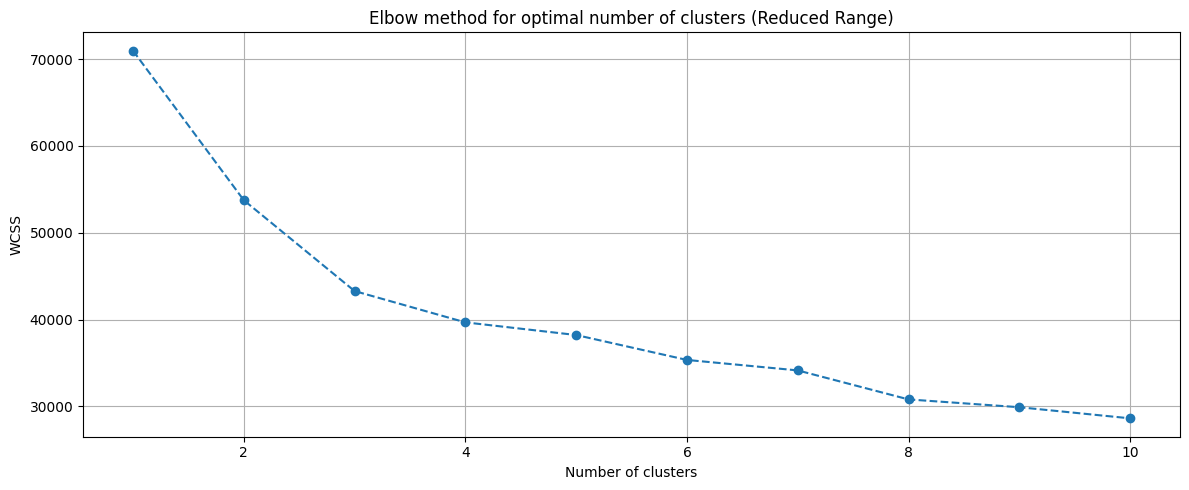

In [56]:
# plotting the results 

plt.figure(figsize= (12, 5))
plt.plot(range(1, 11), wcss_reduced, marker = 'o', linestyle = '--')
plt.title("Elbow method for optimal number of clusters (Reduced Range)")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.tight_layout()
plt.show()


- from here we can see there is not a sharper decline at 3. so that satisifes our assumption that there are three category of furnishing styles in flats. 

In [57]:
n_clusters = 3 
kmeans = KMeans(n_clusters= n_clusters, random_state= 42) 
kmeans.fit(scaled_data)

cluster_assignments = kmeans.predict(scaled_data)

In [58]:
cluster_assignments

array([2, 0, 2, ..., 0, 0, 0], dtype=int32)

- now we will add these cluster labels to the main cleaned data 

In [59]:
df = df.iloc[:, :-18]
df['furnishing_type'] = cluster_assignments

In [60]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==1].sample(3)

,furnishDetails,furnishing_type
1530,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '5 Geyser', '1 Stove', '5 Light', '1 Modular Kitchen', '1 Curtains', '3 TV', '1 Chimney', '5 AC', '4 Bed', '5 Wardrobe', '1 Sofa', 'No Microwave', 'No Washing Machine', 'No Water Purifier']",1
3853,"['1 Water Purifier', '12 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '10 Geyser', '1 Stove', '40 Light', '1 Modular Kitchen', '10 TV', '1 Curtains', '15 AC', '1 Chimney', '10 Bed', '12 Wardrobe', '1 Sofa', '1 Washing Machine', '1 Microwave']",1
2822,"['1 Water Purifier', '1 Fridge', '1 Fan', '1 Exhaust Fan', '1 Dining Table', '1 Geyser', '1 Stove', '1 Light', '1 AC', '1 TV', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '1 Wardrobe', '1 Bed', '1 Sofa', '1 Microwave', '1 Washing Machine']",1


In [61]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==2].sample(3)

,furnishDetails,furnishing_type
1716,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3715,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '7 Light', '1 Modular Kitchen', '4 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3464,"['5 Fan', '1 Exhaust Fan', '5 Geyser', '1 Light', '1 TV', '1 Chimney', '1 Curtains', '1 AC', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2


In [62]:
df[['furnishDetails', 'furnishing_type']][df[['furnishDetails', 'furnishing_type']]['furnishing_type'] ==0].sample(3)

,furnishDetails,furnishing_type
3689,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
176,[],0
3512,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0


- from observing on the `furnishDetails` column and the `furnishing_types` we can conclude the following: 
    - 0 is for furnished 
    - 1 is for semi furnished 
    - 2 is for unfurnished

4.6 Features 

In [63]:
df[['features']].sample(5)

,features
742,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1417,"['Power Back-up', 'Intercom Facility', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
2726,NaN
3225,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Bank Attached Property', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Shopping Centre']"
390,"['Lift(s)', 'High Ceiling Height', 'False Ceiling Lighting', 'Water Storage', 'Natural Light', 'Airy Rooms', 'Spacious Interiors']"


- so this column has information related to the amneties with the flats

In [64]:
(
    df[['features']]
    .isnull()
    .sum()
)

features    701
dtype: int64

- we have scraped the data for the apartments as well so based on the society in this dataframe we will join the dataframe with the apartments dataframe which will eventually help us filling the missing values 

In [65]:
# reading the apartments data 

apartments = get_data("appartments")

In [66]:
apartments.sample(3)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
201,Vipul Belmonte,"3, 4, 5 BHK Apartment in Sector 53, Gurgaon","['Sanar International Hospital', 'Central Plaza Mall', 'Sector 53/54 Metro Station', 'Golf Course Road', 'Lancers International School']","{'Sanar International Hospital': '0.5 Km', 'Central Plaza Mall': '0.5 Km', 'Sector 53/54 Metro Station': '0.7 Km', 'Golf Course Road': '1.3 Km', 'Lancers International School': '1.9 Km', 'IILM University, Gurugram': '3.7 Km', 'DLF Golf and Country Club': '4.1 Km', 'DoubleTree by Hilton Hotel': '4.3 Km', ""Oyster's Water Park"": '5.8 Km', 'Vatika Business Centre': '10 Km', 'Indira Gandhi International Airport': '15.5 Km'}",https://www.99acres.com/vipul-belmonte-sector-53-gurgaon-npxid-r12228,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,450 sq.ft.', 'price-range': '₹ 4.81 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '3,110 sq.ft.', 'price-range': '₹ 6.1 Cr'}, '5 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '3,925 sq.ft.', 'price-range': '₹ 7.7 Cr'}}","['Swimming Pool', 'ATM', 'Water Softener Plant', 'Grocery Shop', 'Wi-Fi Connectivity', 'Pool Table', 'Property Staff', 'Cafeteria', 'Billiards']"
100,Central Park Resorts,"2, 3, 4 BHK Apartment in Sector 48, Gurgaon","['Park Hospital', 'Omaxe Celebration Mall', 'GD Goenka Public School', 'Cambridge College Of Education', 'Gurugram University']","{'Park Hospital': '4.3km', 'Omaxe Celebration Mall': '4.4km', 'GD Goenka Public School': '4.6km', 'Cambridge College Of Education': '4.7km', 'Gurugram University': '6.5km', 'Huda Metro Station': '7.4km', 'Basai Dhankot': '9.2km', 'Iffco Chowk': '10.9km', 'Indira Gandhi Int. Airport': '22.5km'}",https://www.99acres.com/central-park-resorts-sector-48-gurgaon-npxid-r6802,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,255 - 1,676 sq.ft.', 'price-range': '₹ 2.75 - 5.48 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,700 - 3,464 sq.ft.', 'price-range': '₹ 3.65 - 11.32 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '3,800 - 4,615 sq.ft.', 'price-range': '₹ 9.75 - 15.08 Cr'}}","['Swimming Pool', 'Golf Course', 'ATM', 'Restaurant', 'Waiting Lounge', 'Cafeteria', 'Shopping Centre', 'Video Door Security', 'Multipurpose Court']"
180,ROF Normanton Park,"Land in Sohna, Gurgaon","['Sohna Road', 'Ascendas OneHub Gurgaon Business Park', 'K.R. Mangalam University', 'GD Goenka High School', 'Country Inn & Suites By Radisson']","{'Sohna Road': '0.1 Km', 'Ascendas OneHub Gurgaon Business Park': '2.2 Km', 'K.R. Mangalam University': '4.7 Km', 'GD Goenka High School': '5.3 Km', 'Country Inn & Suites By Radisson': '5.9 Km', 'Sohna Bus Stand': '7.6 Km', 'Vardaan Hospital': '7.6 Km', 'Damdama Lake': '8.8 Km', 'Airia Mall': '8.9 Km'}",https://www.99acres.com/rof-normanton-park-sohna-gurgaon-npxid-r386250,"{'Land': {'building_type': '', 'area_type': 'Plot Area', 'area': '1,152 - 1,593 sq.ft.', 'price-range': '₹ 1.25 - 1.73 Cr'}}","['Reading Lounge', 'Reflexology Park', 'Wi-Fi Connectivity', 'Gated Community', 'Senior Citizen Sitout']"


In [67]:
# converting property type to lowercase in order to match with the society name in our data 

apartments.PropertyName = apartments.PropertyName.str.lower()

In [68]:
(
    apartments
    .PropertyName 
    .sample(4)
)

77                 tata primanti
171                  godrej icon
172    orris aster court premier
78                dlf park place
Name: PropertyName, dtype: object

In [69]:
# extracting those features which have null values in our data 

temp_df = (
    df[df['features']
    .isnull()]
)

In [70]:
temp_df.shape

(701, 26)

In [71]:
x = temp_df.merge(apartments, left_on= "society", right_on= "PropertyName", how = "left")["TopFacilities"]

In [72]:
df.loc[temp_df.index, 'features'] = x.values 

In [73]:
(
    df 
    .features 
    .isnull()
    .sum()
)

np.int64(544)

- so previously, there were 701 missing values which has now reduced to 544

In [74]:
(
    df 
    .features 
    .sample(3)
)

1840                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN
2230                                                                                                                                                                                                                                                                                                                                      ['Private Garden / Terra

- now since features have many values and it's logically right also. there are many apartments which can offer various kinds of amneties which are unique. 
- now based on the amenieties importance we will assign them weights which will be eventually used to get the luxary score for the apartments

In [75]:
# finding out how many different amneties are present 
# features have lists which contains the various elements provided by the variaous apartments. 
# we will convert them to actaul list in order to extract unique amneties so that we can assign them weights 

import ast 

df['feature_list'] = (
    df 
    .features 
    .apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])
)

In [76]:
# now we are using MultiLabelBinarizer to convert the feature list into the binary matrix
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['feature_list'])

# converting the binary matrix into the dataframe 

features_binary_df = pd.DataFrame(features_binary_matrix, columns= mlb.classes_)

In [77]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3738,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1971,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
features_binary_df.shape

(3942, 130)

- there are 130 unique amneties provided by various flats. now we will assign them weights

In [79]:
# define the weights for each feature as provided 
# assigning weights as per percieved luxary contributions

weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [80]:
# calculating luxary score for each row 

luxary_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis = 1)

In [81]:
# addding this luxary score to the original dataframe 

df['luxary_score'] = luxary_score

In [82]:
df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,feature_list,luxary_score
3076,flat,unitech fresco,sector 50,1.82,9912.0,1836.0,Super Built up area 1836(170.57 sq.m.)Built Up area: 1830 sq.ft. (170.01 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,3,3+,others,14.0,east,Moderately Old,"['Rapid Metro Station Sector 55 56', 'M3M Cosmopolitan', 'Golf Course Ext Rd', 'The Paras World School', 'Park Hospital', 'IGI Airport', ""McDonald's India"", 'SkyJumper Trampoline Park']","['5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '12 Light', '5 AC', '1 Chimney', '3 Curtains', '1 Modular Kitchen', '3 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1836.0,1830.0,1500.0,0,0,0,0,1,2,"[Centrally Air Conditioned, Water purifier, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",174
2535,flat,m3m woodshire,sector 107,1.20,6176.0,1943.0,Super Built up area 1943(180.51 sq.m.)Built Up area: 1750 sq.ft. (162.58 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),3,3,3,not available,7.0,south,Relatively New,"['Signum 107', 'Nora Solomon Medicenter', 'Indira Gandhi International Airport', 'The Shikshiyan School', 'Najafgarh Jheel Bird Sanctuary', 'Skylark Cricket Academy']","['5 Fan', '1 Exhaust Fan', '2 Geyser', '5 Light', '5 AC', '1 Chimney', '1 Curtains', '1 Modular Kitchen', '2 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",1943.0,1750.0,1550.0,0,0,0,0,0,2,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
874,flat,central park flower valley,sector 33,1.79,11251.0,1591.0,Super Built up area 1789(166.2 sq.m.),3,3,3,not available,3.0,south,Old Property,"['Golf Course Extension Rd', 'Rajiv Chowk - Sohna Highway', 'KMP corridor', 'Marigold Secondary School', 'Alpine Convent School', 'The Millenium School', 'GD Goenka University', 'Medanta Hospital', 'Alpine Hospital', 'Pushpanjali Hospital', 'IGI Airport', 'Country Inn', 'Westin', 'Central Park Resorts', 'De Adventure Park']","['3 Wardrobe', '4 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",

In [83]:
# dropping the unnecessary columns 

df.drop(columns= ['nearbyLocations','furnishDetails','features','feature_list','additionalRoom'],inplace=True)

In [84]:
df.sample(3)

,property type,society,sector,price,price_per_sq_ft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxary_score
2016,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,south-west,Relatively New,NaN,NaN,54917.0,0,0,0,0,0,0,37
3642,flat,signature global synera,sector 81,0.39,6500.0,600.0,Carpet area: 600 (55.74 sq.m.),2,2,2,6.0,south-west,Relatively New,NaN,NaN,600.0,0,0,0,0,0,0,37
3297,house,independent,sector 105,0.50,50000.0,100.0,Built Up area: 100 (9.29 sq.m.),2,2,No,1.0,NaN,undefined,NaN,100.0,NaN,0,0,0,0,0,0,0


In [85]:
df.shape 

(3942, 23)

In [86]:
dir_path = "/Users/abhisheksaurav/Desktop/real_estate_project/Data Collection/Data/City/chandigarh/cleaned_data"
file_name = "gurgaon_properties_cleaned_v2"
df.to_csv("{}/{}.csv".format(dir_path, file_name), index = False)

In [87]:
df.balcony.value_counts()

balcony
3+    1218
3     1133
2      966
1      416
No     209
Name: count, dtype: int64